# Bankruptcy Prevention

**Business Objective:**

The goal here is to model the probability that a business goes bankrupt from different features.since the variable to predict is binary (bankruptcy or non-bankruptcy).

**Details of Dataset Features:**

* The data file contains 7 features about 250 companies including the following variables:
* industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
* management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
* financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high * * * flexibility.
* credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
* competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high
  competitiveness.
* operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
* class: bankruptcy, non-bankruptcy (target variable).

#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Bankrupt Dataset

In [3]:
bankrupt = pd.read_excel("/content/bankruptcy-prevention.xlsx")
bankrupt

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


#Data Cleaning

In [4]:
# Split the single column into multiple columns using the semicolon delimiter
bankrupt = bankrupt.iloc[:, 0].str.split(';', expand=True)
bankrupt

,0,1,2,3,4,5,6
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [5]:
# Rename the columns
bankrupt.columns = [
    'industrial_risk', 'management_risk', 'financial_flexibility',
    'credibility', 'competitiveness', 'operating_risk', 'class'
]
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [6]:
# Convert all columns except 'class' to float
columns_to_convert = bankrupt.columns[:-1]
bankrupt[columns_to_convert] = bankrupt[columns_to_convert].astype(float)

In [7]:
# Inspect the unique values in the 'class' column
print(bankrupt['class'].unique())

['bankruptcy' 'non-bankruptcy']


In [8]:
# Convert target variable class to binary
bankrupt['class'] = bankrupt['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


In [9]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.428000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**This appears to be a summary of descriptive statistics for six variables:**

* **Count**: The number of observations (data points) for each variable.
Mean : which means that the average value of industrial_risk across all 250 observations is approximately 0.518.

* **Std**: The standard deviation of each variable. This measures the amount of variation or dispersion in the data.

* **Min** : The minimum value in each column. In this case, all columns have a minimum value of 0.000.

* **25%** : This is the value below which 25% of the data points fall under 0

* **50%** : This is the middle value of the data, where half the data points are below and half are above.

* **75%** : This is the value below which 75% of the data points fall.

* **Max** :The maximum value in each column. In this case, all columns have a maximum value of 1.000.



In [10]:
print(bankrupt.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB
None


In [12]:
print(bankrupt.shape)

(250, 7)


#Checking is there any missing values are there in data or not


In [11]:
bankrupt.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

* There is no missing value in data

In [13]:
bankrupt_new = bankrupt.iloc[:,:] #Here we seperate the all rows and columns by ,
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


* Modifying the copy without affecting the original data.
* Creating a backup of the original data.
* Performing operations on the copy that don't affect the original data.

#**Exploratory Data Analysis (EDA)**

In [14]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,-0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,-0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,-0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,0.279786
class,0.227823,0.370838,-0.751020,-0.755909,-0.899452,0.279786,1.000000


#**Positive Correlations:**

* Higher industrial risk = higher management risk
* Higher financial flexibility = higher credibility
* Higher financial flexibility = higher competitiveness
* Higher operating risk = certain classification

#**Negative Correlations:**

* Higher industrial risk = lower financial flexibility
* Higher management risk = lower financial flexibility
* Higher credibility = different classification
* Higher competitiveness = different classification

#**Insights:**

* Higher risk = lower financial flexibility = vulnerability
Higher financial flexibility = higher credibility & competitiveness = resilience
Classification influenced by credibility & competitiveness
Inform decisions on risk management, financial planning, and competitiveness strategies.

<Axes: >

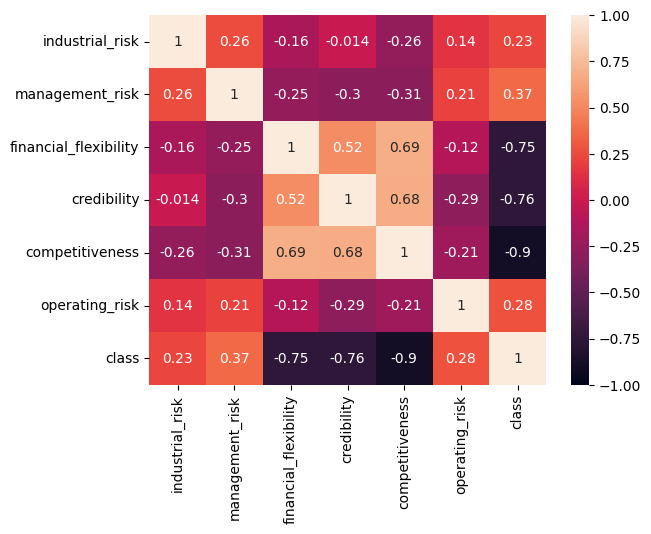

In [15]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

class
0    143
1    107
Name: count, dtype: int64

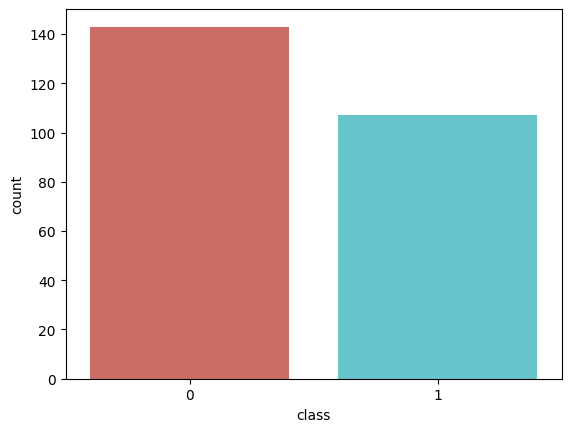

In [16]:
sns.countplot(x = 'class', data = bankrupt_new, palette = 'hls')  #bar graph of target variable class_yn
bankrupt_new['class'].value_counts()

**Here the barplot shows the most of the companies goes under non-bankrupt state**

financial_flexibility
0.0    119
0.5     74
1.0     57
Name: count, dtype: int64

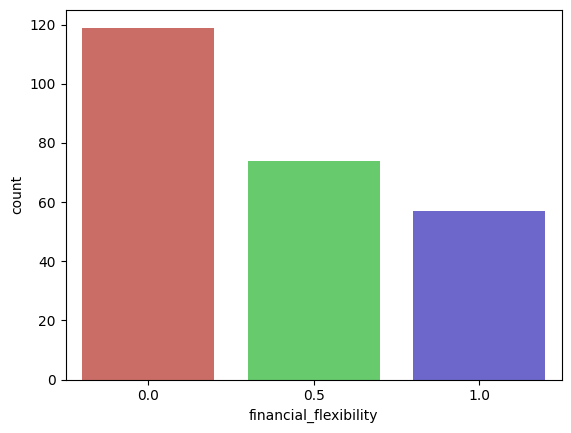

In [ ]:
sns.countplot(x = 'financial_flexibility', data = bankrupt_new, palette = 'hls')
bankrupt_new['financial_flexibility'].value_counts()

* **The Barplot of financial_flexibility shows the lower Risk**


industrial_risk
1.0    89
0.5    81
0.0    80
Name: count, dtype: int64

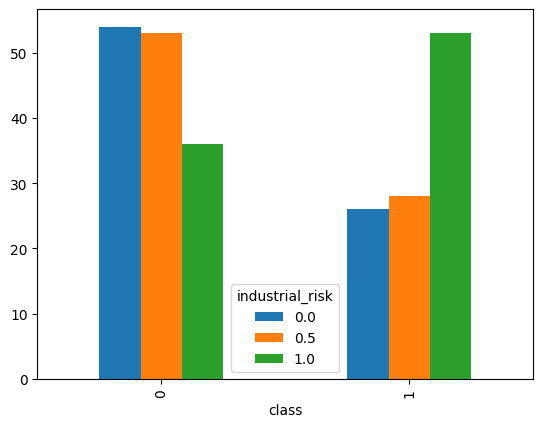

In [ ]:
# for visualization

pd.crosstab(bankrupt_new["class"], bankrupt["industrial_risk"]).plot(kind="bar")
bankrupt["industrial_risk"].value_counts()

**Here barplot shows the visualization of the industrial_risk that tells that:**

**bankruptcy**
* distribution of industrial_risk is skewed towards higher risk   

**Non-Bankruptcy**
* distribution of industiral_risk is skewed towards low risk

financial_flexibility
0.0    119
0.5     74
1.0     57
Name: count, dtype: int64

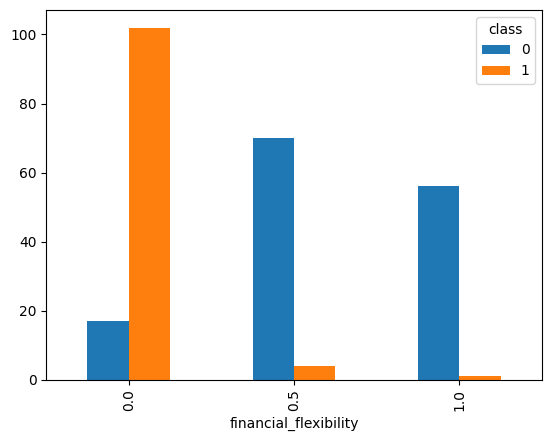

In [ ]:
pd.crosstab(bankrupt_new['financial_flexibility'], bankrupt_new['class']).plot(kind='bar')
bankrupt_new['financial_flexibility'].value_counts()

* The height of each bar will represent the frequency of that combination.
* Low financial_flexibility values are more common among bankrupt companies
  (class_yn=0)
* High financial_flexibility values are more common among non-bankrupt  
  companies (class_yn=1)

credibility
0.0    94
1.0    79
0.5    77
Name: count, dtype: int64

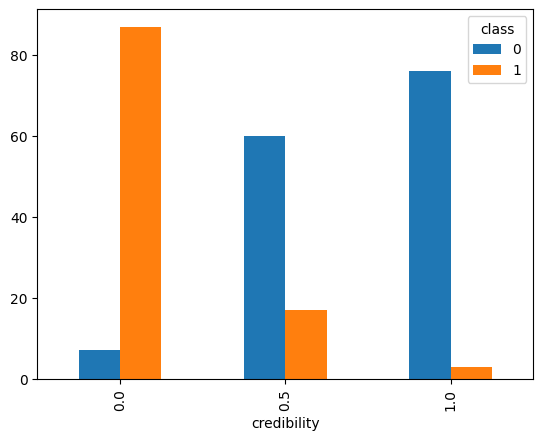

In [ ]:
pd.crosstab(bankrupt_new['credibility'], bankrupt_new['class']).plot(kind='bar')
bankrupt_new['credibility'].value_counts()

* The plot is a bar chart showing the frequency of each combination of values in the credibility column and the class_yn column.

* The bars for class_yn=0 (bankruptcy) are taller for lower credibility values,
 it may indicate that companies with lower credibility are more likely to go bankrupt.

* The bars for class_yn=1 (non-bankruptcy) are taller for higher credibility
  values, it may indicate that companies with higher credibility are more likely to avoid bankruptcy.


operating_risk
1.0    114
0.0     79
0.5     57
Name: count, dtype: int64

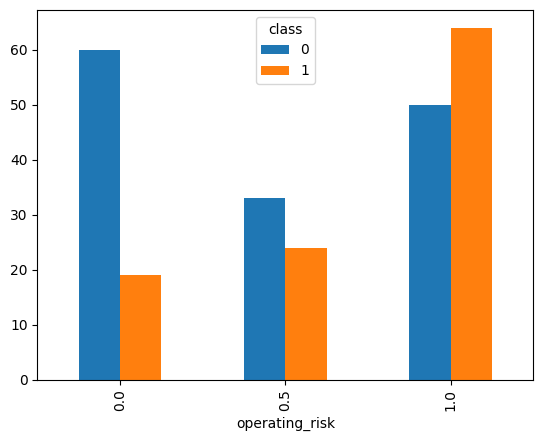

In [ ]:
pd.crosstab(bankrupt_new['operating_risk'], bankrupt_new['class']).plot(kind='bar')
bankrupt_new['operating_risk'].value_counts()

* High operating_risk values are more common among bankrupt companies (class_yn=0)

* Low operating_risk values are more common among non-bankrupt companies (class_yn=1)

financial_flexibility
0.0    119
0.5     74
1.0     57
Name: count, dtype: int64

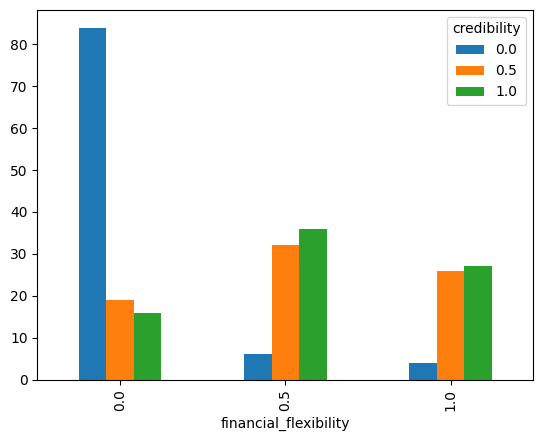

In [ ]:
pd.crosstab(bankrupt_new['financial_flexibility'], bankrupt_new['credibility']).plot(kind = 'bar')
bankrupt_new['financial_flexibility'].value_counts()

* Low financial_flexibility values are more common among companies with low
  credibility values
* High financial_flexibility values are more common among companies with high
  credibility values
* There's a correlation between financial_flexibility and credibility


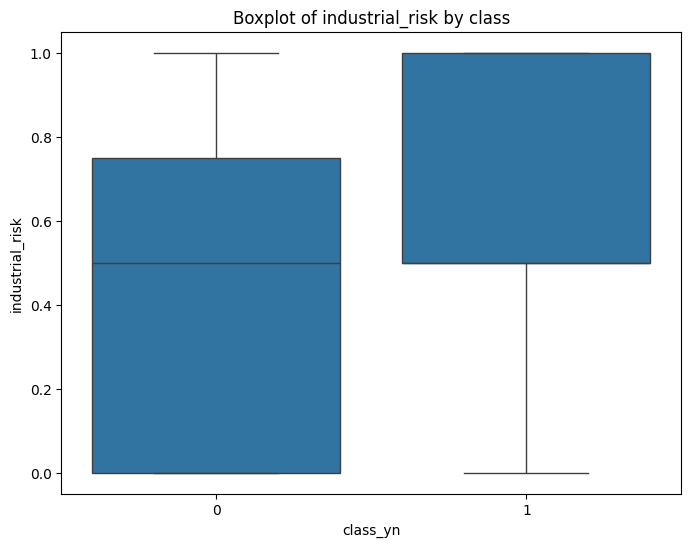

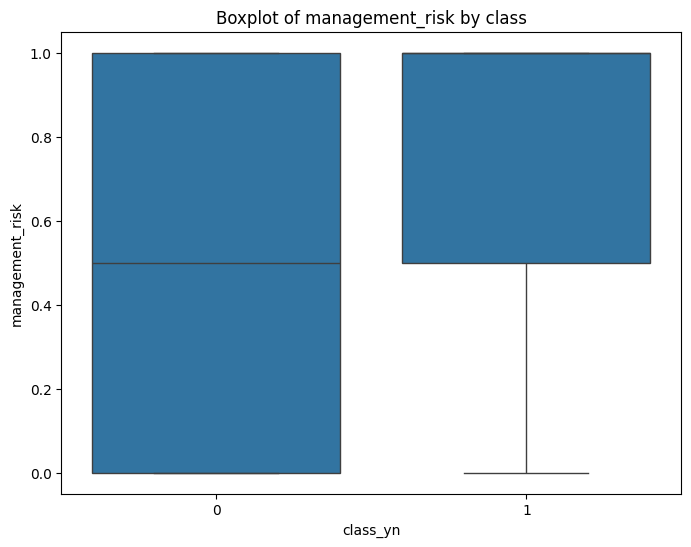

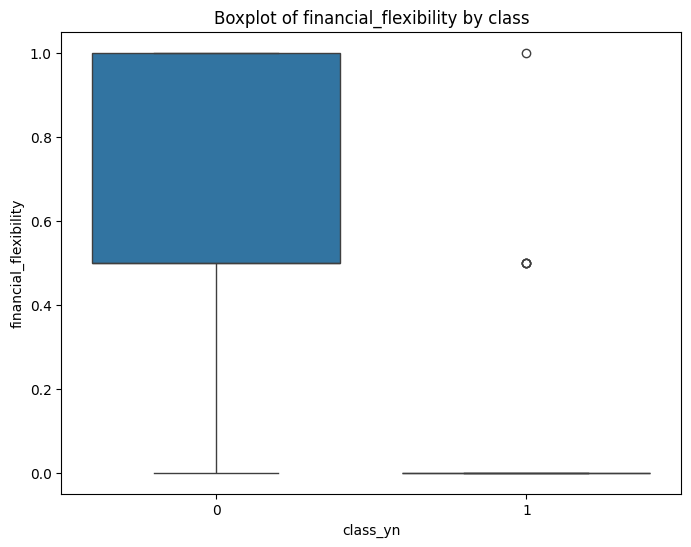

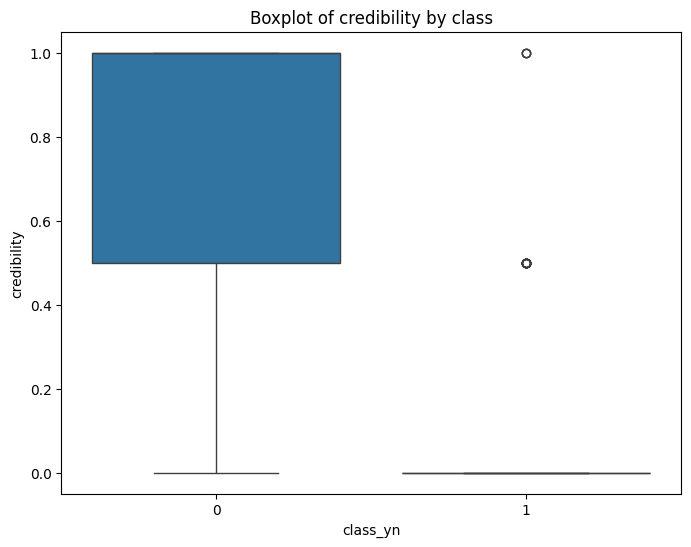

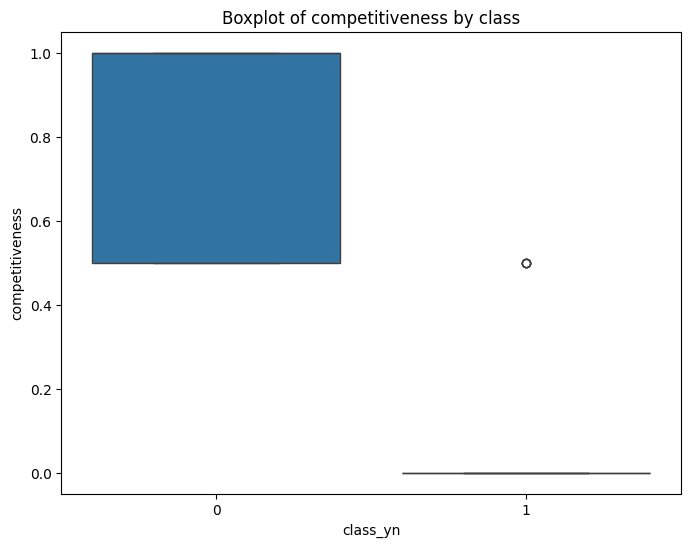

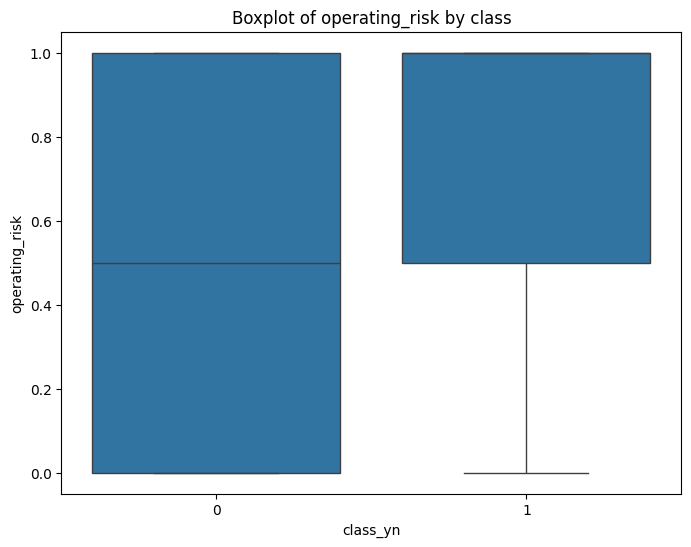

In [ ]:
# Create boxplots for each numeric feature grouped by 'class'
for col in bankrupt_new.columns[:-1]:  # Exclude 'class_yn' column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=col, data=bankrupt_new)
    plt.title(f'Boxplot of {col} by class')
    plt.xlabel('class_yn')
    plt.ylabel(col)
    plt.show()

#**Observations:**

Bankruptcy Group:

#**Boxplot of industrial_risk , management_risk and operating_risk by class:**
* Median values: around 0.8
* IQR: 0.6-1.0

Non-Bankruptcy Group:
* Median values: 0.5 (industrial_risk), 0.6 (others)
* IQR: 0.4-0.8

**No outliers in any group**

#**Inferences:**

**Industrial Risk:**
* Higher in bankruptcy group
* More variable in bankruptcy group
* Lower and more consistent in non-bankruptcy group

**Management Risk:**
* Higher in bankruptcy group
* More variable in bankruptcy group
* Lower and more consistent in non-bankruptcy group

**Operating Risk:**
* Higher in bankruptcy group
* More variable in bankruptcy group
* Lower and more consistent in non-bankruptcy group

Overall analysis is that as compare to bankrupt companies tends to have higher vairable levels of industrial, management and operating risk compared to non-bankrupt companies.


#**Observations:**

**Bankruptcy Group:**

#**Boxplot of financial_flexibility, credibility and competitiveness by class:**

* Low financial flexibility, credibility, and competitiveness
* A few outliers with higher values (around 0.3 and 0.5)

**Non-Bankruptcy Group:**

* Better financial flexibility, credibility, and competitiveness
* Wider distribution and more variability in financial health

#**Inferences:**

**Bankruptcy Group:**

* Generally low financial flexibility, credibility, and competitiveness
* A few companies have higher values despite being in bankruptcy group

**Non-Bankruptcy Group:**

* Higher financial flexibility, credibility, and competitiveness associated  
  with lower bankruptcy risk
* More variability in financial health among non-bankrupt companies


In [17]:
# standadize the data

# Assuming 'bankrupt_new' is your DataFrame

# Select the features to standardize (exclude the target variable 'class')
features_to_standardize = bankrupt_new.columns[:-1]

# Use StandardScaler to standardize the selected features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
bankrupt_new[features_to_standardize] = scaler.fit_transform(bankrupt_new[features_to_standardize])

# Display the standardized data
print(bankrupt_new.head())


   industrial_risk  management_risk  financial_flexibility  credibility  \
0        -0.043827         0.941732              -0.938172    -1.132941   
1        -1.261256         0.941732              -0.938172    -1.132941   
2         1.173601        -1.497989              -0.938172    -1.132941   
3        -0.043827        -1.497989              -0.938172     0.072315   
4         1.173601         0.941732              -0.938172    -1.132941   

   competitiveness  operating_risk  class  
0         -1.08231       -0.161400      1  
1         -1.08231        0.991457      1  
2         -1.08231        0.991457      1  
3         -1.08231        0.991457      1  
4         -1.08231        0.991457      1  


In [18]:
# Separate target and independent variables
from sklearn.model_selection import train_test_split,cross_val_score
target_variable = 'class'
y = bankrupt_new[target_variable]
X = bankrupt_new.drop(columns=[target_variable])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Random Forest Model**

In [19]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Make predictions on the test set
y_train_pred= rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
#conf = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_test, y_test_pred)

# Perform cross-validation
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the evaluation results
print("Accuracy:", accuracy*100)
#print(conf)
print("\nClassification Report:\n", class_report)

# Print the cross-validation results
print(f'Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}')

Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Cross-Validation Accuracy: 1.00 ± 0.01


# **Support Vector Machine(SVM)**

In [21]:
# Build the SVM model
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [22]:
# Make predictions on the test set
y_train_pred= svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Perform cross-validation
cross_val_scores = cross_val_score(svm_model, X, y, cv=5)

# Print the evaluation results
print("Accuracy:", accuracy*100)
print("\nClassification Report:\n", class_report)

# Print the cross-validation results
print(f'Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}')

Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Cross-Validation Accuracy: 1.00 ± 0.01


# **Logistic Regression Model**

In [23]:
# Define and train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Make predictions
y_train_pred= logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
# Perform cross-validation
cross_val_scores = cross_val_score(logreg, X, y, cv=5)

# Print the evaluation results
print("Accuracy:", accuracy*100)
print("\nClassification Report:\n", class_report)
# Print the cross-validation results
print(f'Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}')

Accuracy: 98.66666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Cross-Validation Accuracy: 1.00 ± 0.01


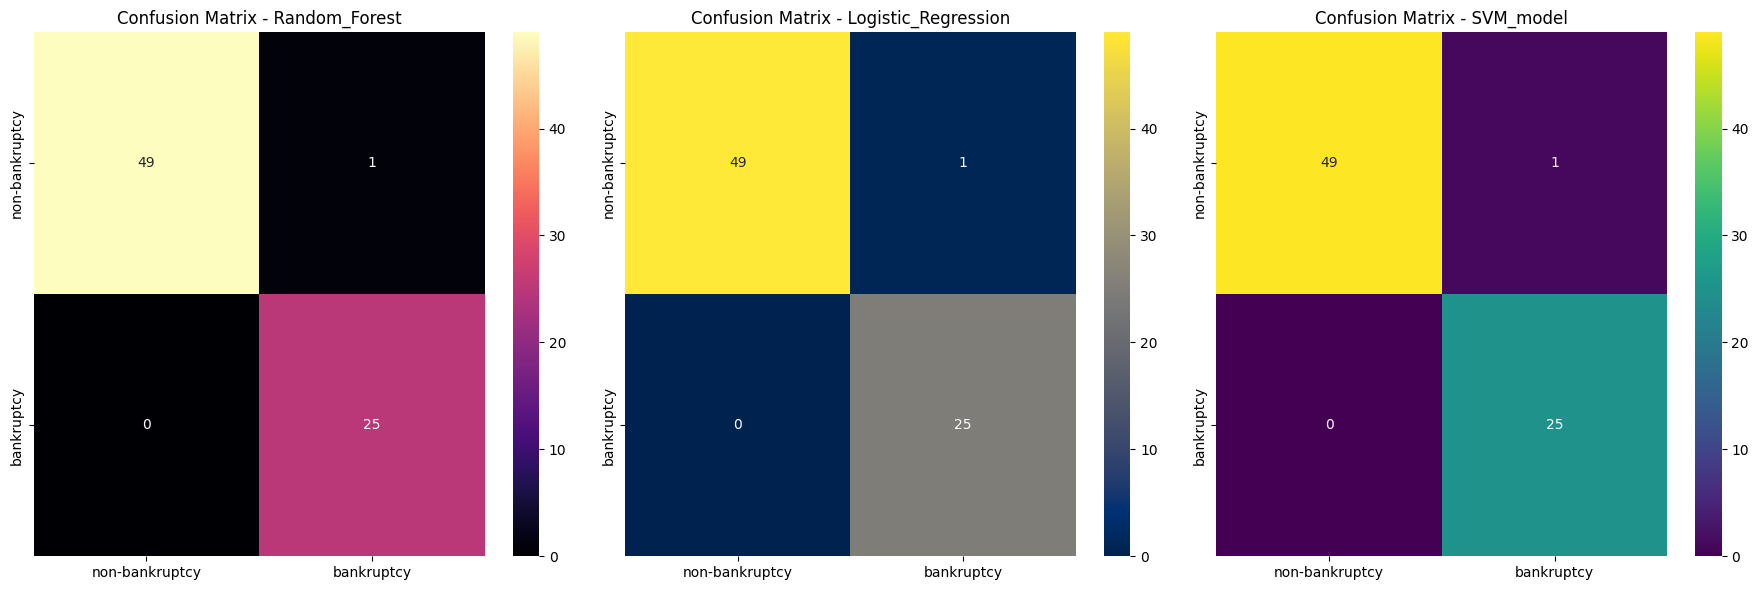

In [25]:
#confusion matrices
cm_model1 = confusion_matrix(y_test, y_test_pred)
cm_model2 = confusion_matrix(y_test, y_test_pred)
cm_model3 = confusion_matrix(y_test, y_test_pred)

labels = ['non-bankruptcy', 'bankruptcy']

# Plotting all three confusion matrices in a single figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plotting confusion matrix for model 1
sns.heatmap(cm_model1,annot=True, cmap='magma', fmt='g', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix - Random_Forest')

# Plotting confusion matrix for model 2
sns.heatmap(cm_model2, annot=True, cmap='cividis', fmt='g', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic_Regression')

# Plotting confusion matrix for model 3
sns.heatmap(cm_model3, annot=True, cmap='viridis', fmt='g', xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title('Confusion Matrix - SVM_model')

plt.tight_layout()
plt.show()

In [26]:
# check for over fitting of the models

# Calculate the difference between train and test accuracy for each model
rf_overfitting = accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred)
svm_overfitting = accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred)
logreg_overfitting = accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_test_pred)

# Print the overfitting results
print(f'Random Forest Overfitting: {rf_overfitting:.4f}')
print(f'SVM Overfitting: {svm_overfitting:.4f}')
print(f'Logistic Regression Overfitting: {logreg_overfitting:.4f}')


Random Forest Overfitting: 0.0076
SVM Overfitting: 0.0076
Logistic Regression Overfitting: 0.0076


In [ ]:
# Check for overfitting
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.99
Test Accuracy: 1.00


# **Feature Importance**


Feature Importances:
                        Random Forest  Logistic Regression        SVM
industrial_risk             0.017673             0.319876   2.350675
management_risk             0.028724             0.522954   1.971267
financial_flexibility       0.192287            -1.263124  -6.098232
credibility                 0.236721            -1.450191  -4.338616
competitiveness             0.501340            -2.711592 -11.352045
operating_risk              0.023255             0.109462   0.848511


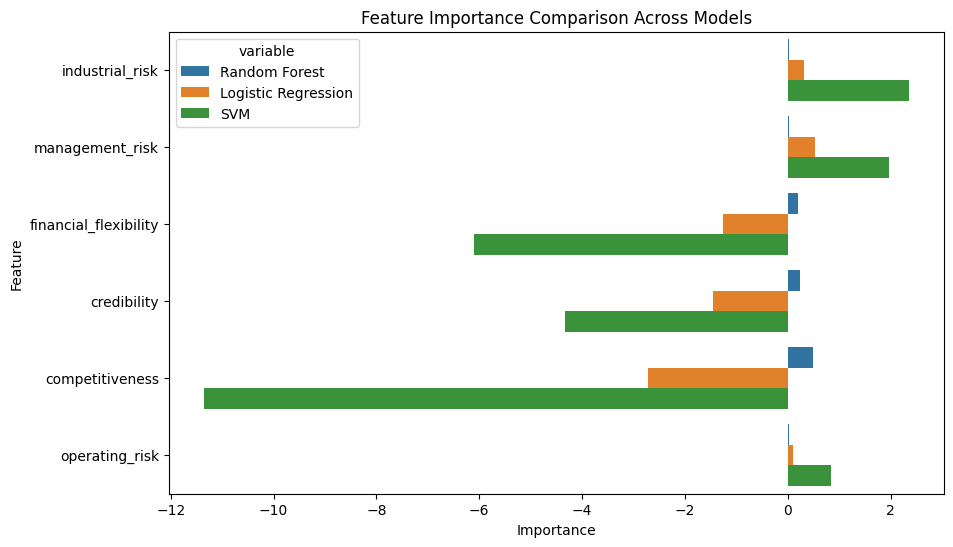

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature importances
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Random Forest'])
feature_importances_lr = pd.DataFrame(logreg.coef_.flatten(), index=X.columns, columns=['Logistic Regression'])

# Check if svm_model uses a linear kernel
if svm_model.kernel == 'linear':
    feature_importances_svm = pd.DataFrame(svm_model.coef_.flatten(), index=X.columns, columns=['SVM'])
else:
    # Handle non-linear kernel
    svm_coefficients = svm_model.dual_coef_.flatten() @ svm_model.support_vectors_
    feature_importances_svm = pd.DataFrame(svm_coefficients, index=X.columns, columns=['SVM'])

# Concatenate into a single DataFrame
feature_importances = pd.concat([feature_importances_rf, feature_importances_lr, feature_importances_svm], axis=1)

# Print feature importances
print("\nFeature Importances:\n", feature_importances)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.reset_index().melt(id_vars='index'), x='value', y='index', hue='variable', orient='h')
plt.title('Feature Importance Comparison Across Models')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


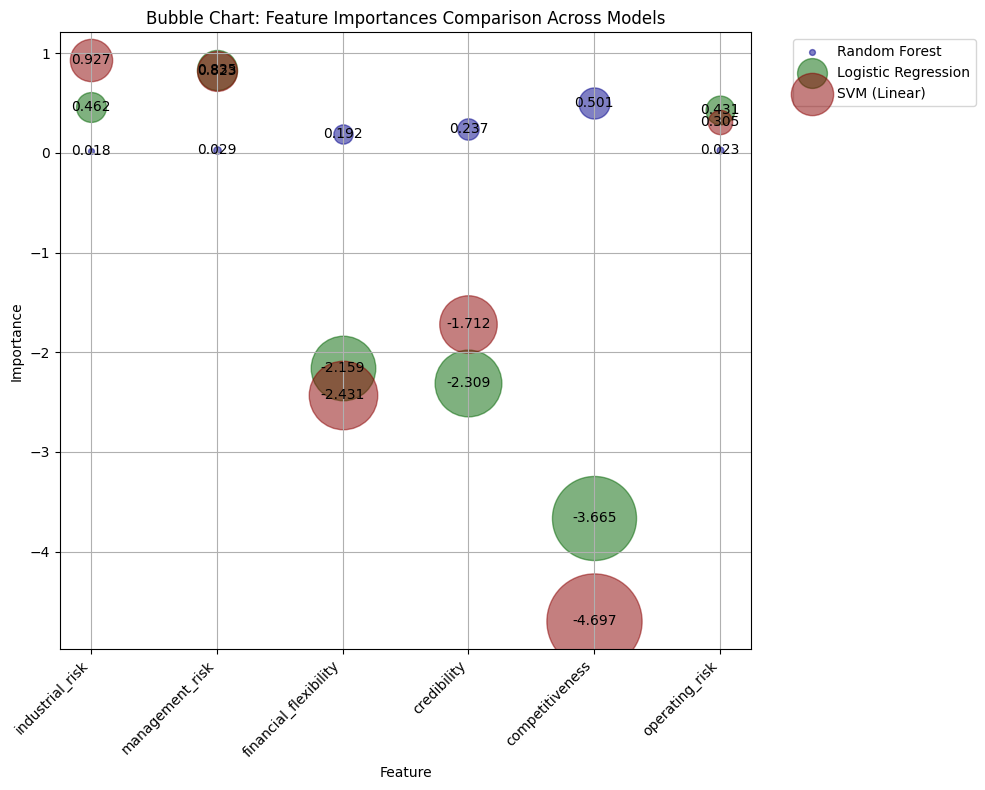

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example feature importances data (replace with your actual values)
features = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk']
feature_importances_rf = pd.DataFrame([0.017673, 0.028724, 0.192287, 0.236721, 0.501340, 0.023255], columns=['Random Forest'])
feature_importances_logreg = pd.DataFrame([0.462343, 0.834791, -2.159445, -2.308794, -3.665228, 0.430639], columns=['Logistic Regression'])
feature_importances_svm = pd.DataFrame([0.927254, 0.822815, -2.430869, -1.712487, -4.697089, 0.305326], columns=['SVM (Linear)'])

plt.figure(figsize=(10, 8))

def plot_bubbles(importances, label, color):
    for i, importance in enumerate(importances):
        y_offset = 0.05 if importance >= 0 else -0.1
        plt.scatter(features[i], importance, s=np.abs(importance)*1000, alpha=0.5, color=color, label=label if i == 0 else "")
        plt.annotate(f'{importance:.3f}', (features[i], importance), textcoords="offset points", xytext=(0, 0), ha='center', va='center')

# Convert DataFrame to numpy array and flatten
rf_importances = feature_importances_rf['Random Forest'].to_numpy().flatten()
lr_importances = feature_importances_logreg['Logistic Regression'].to_numpy().flatten()
svm_importances = feature_importances_svm['SVM (Linear)'].to_numpy().flatten()

plot_bubbles(rf_importances, 'Random Forest', 'darkblue')
plot_bubbles(lr_importances, 'Logistic Regression', 'darkgreen')
plot_bubbles(svm_importances, 'SVM (Linear)', 'darkred')

plt.title('Bubble Chart: Feature Importances Comparison Across Models')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**Inferences:**

**Industrial Risk:**

Random Forest: Has very low importance.
Logistic Regression and SVM: Positive importance, moderately high.

**Management Risk:**

Random Forest: Low importance.
Logistic Regression and SVM: Highest positive importance among all features.

**Financial Flexibility:**

Random Forest: Moderate importance.
Logistic Regression and SVM: Negative importance, indicating it decreases the probability of bankruptcy.

**Credibility:**

Random Forest: Moderate to high importance.
Logistic Regression and SVM: Negative importance.

**Competitiveness:**

Random Forest: Highest importance.
Logistic Regression and SVM: Most negative importance.

**Operating Risk:**

Random Forest: Low importance.
Logistic Regression: Positive importance, moderately high.
SVM (Linear): Moderate positive importance.

**Conclusion:**
* Random Forest emphasizes Competitiveness.
* Logistic Regression and SVM emphasize Management Risk.
* Features like Financial Flexibility and Credibility show a negative impact on the probability of bankruptcy in Logistic Regression and SVM.

# **ROC-AUC Curve:**

In [29]:
# Predict probabilities for Random Forest and SVM classifiers
from sklearn.metrics import roc_curve, auc
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]
logreg_probs = logreg.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and ROC area for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Compute ROC curve and ROC area for Logistic regression
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)

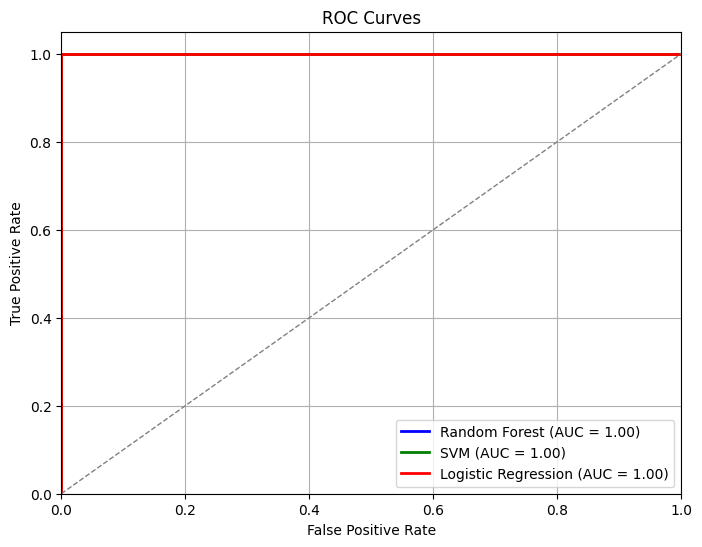

In [30]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Observation:**

* It is showing stright line bcz all three modules
  accuracy is 100% and there are no false positives or false negatives at any threshold, resulting in a perfect ROC curve.

* If all models have 100% accuracy, the ROC curve will be a diagonal
  line from (0,0) to (1,1) with an AUC of 1.

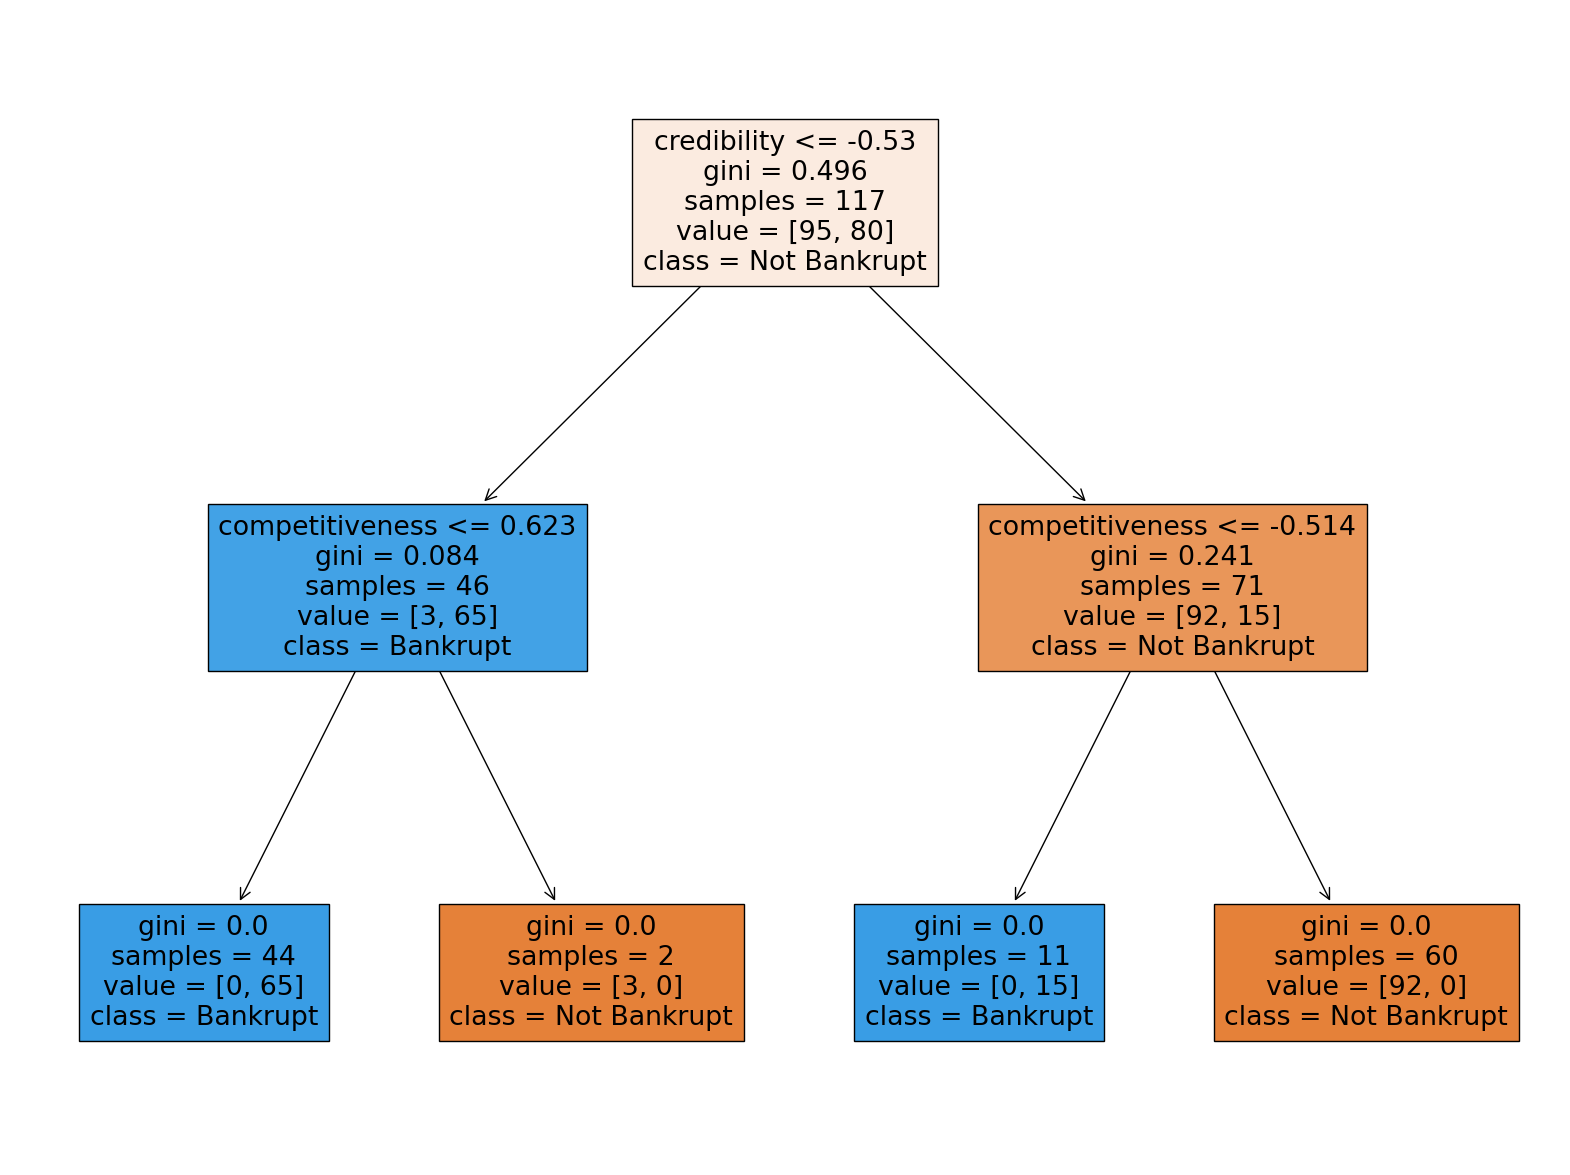

In [31]:
# Get a decision tree from the forest (the first tree)
from sklearn import tree
tree_in_forest = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_in_forest, feature_names=X.columns, class_names=['Not Bankrupt', 'Bankrupt'], filled=True)
plt.show()


# **Saving the trained model**


In [ ]:
import pickle

In [ ]:
# Save the trained model using pickle
filename = 'Trained_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
#loading the saved model
loaded_model=pickle.load(open('Trained_model.sav','rb'))